#Training Final model with important features for Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("PlacementData.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
x = df.drop(columns=['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','workex','etest_p','status','salary'])
x.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,67.00,91.00,58.00,Mkt&HR,58.80
1,79.33,78.33,77.48,Mkt&Fin,66.28
2,65.00,68.00,64.00,Mkt&Fin,57.80
3,56.00,52.00,52.00,Mkt&HR,59.43
4,85.80,73.60,73.30,Mkt&Fin,55.50


In [4]:
Y = pd.DataFrame(df.status)
Y.head()

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed


**Label Encoding**

In [5]:
#Encoding Target Attribute
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
Y.status = Le.fit_transform(Y.status)
Y.head()
# #Placed-1 Not Placed-0

,status
0,1
1,1
2,1
3,0
4,1


In [6]:
#Encoding specialisation Attribute
x.specialisation = Le.fit_transform(x.specialisation)
x.head()
#Mkt&HR-1 Mkt&Fin-0

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,67.00,91.00,58.00,1,58.80
1,79.33,78.33,77.48,0,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,1,59.43
4,85.80,73.60,73.30,0,55.50


**Normalization**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [8]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
0,0.538240,0.889621,0.195122,1.0,0.284483
1,0.792414,0.680890,0.670244,0.0,0.564843
2,0.497011,0.510708,0.341463,0.0,0.247001
3,0.311482,0.247117,0.048780,1.0,0.308096
4,0.925788,0.602965,0.568293,0.0,0.160795


**Splitting for Training and Testing Dataset**

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,Y,test_size=0.2,random_state=5)

In [10]:
X_train.head()

,ssc_p,hsc_p,degree_p,specialisation,mba_p
214,0.435168,0.345964,0.073171,1.0,0.337706
39,0.826840,0.510708,0.341463,0.0,0.425412
84,0.600082,0.428336,0.487805,0.0,0.404423
40,0.764997,0.658979,0.731707,0.0,0.581334
107,0.847454,0.873147,0.804878,1.0,0.836207


In [11]:
X_train.shape

(172, 5)

In [12]:
X_test.shape

(43, 5)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RFtree = RandomForestClassifier(criterion="gini", min_samples_split=2)
RFtree.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score
Final_pred = RFtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(Y_test,Final_pred)*100 ,2), "%")

Accuracy Score : 93.02 %


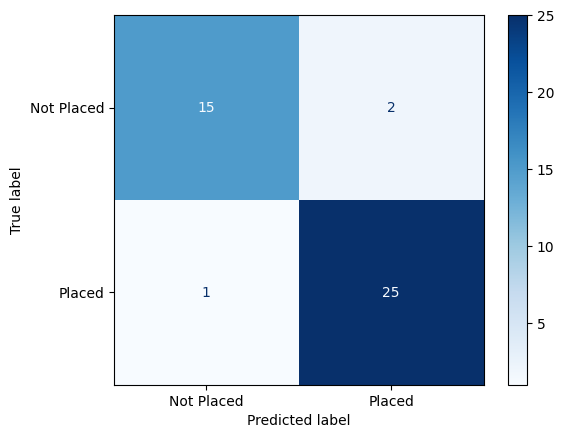

In [16]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test,Final_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['Not Placed', 'Placed'])

In [17]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Final_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.93      0.96      0.94        26

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.93        43
weighted avg       0.93      0.93      0.93        43



In [18]:
import pickle
pickle.dump(RFtree,open("Prediction.pkl","wb"))